<a href="https://colab.research.google.com/github/SalmanOkz/data_warehouse_work/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab 10
- proprocessing




In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:

data = {
    'Name': [
        'Alice', 'Bob', 'Charlie', 'David', 'Eve',
        'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'
    ],
    'Age': [
        25, 30, 35, 40, np.nan,
        28, np.nan, 45, 38, np.nan
    ],
    'Salary': [
        50000, 60000, 75000, np.nan, 65000,
        np.nan, 72000, 88000, np.nan, 54000
    ],
    'Department': [
        'HR', 'IT', 'Finance', 'IT', 'HR',
        'Finance', 'IT', 'HR', 'Finance', 'IT'
    ]
}

df = pd.DataFrame(data)
print(df)


      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  30.0  60000.0         IT
2  Charlie  35.0  75000.0    Finance
3    David  40.0      NaN         IT
4      Eve   NaN  65000.0         HR
5    Frank  28.0      NaN    Finance
6    Grace   NaN  72000.0         IT
7   Hannah  45.0  88000.0         HR
8      Ian  38.0      NaN    Finance
9     Jack   NaN  54000.0         IT


In [3]:
df.isnull().sum()

,0
Name,0
Age,3
Salary,3
Department,0


In [4]:
mean_value = df[['Salary','Age']].mean()
print(mean_value)

Salary    66285.714286
Age          34.428571
dtype: float64


In [5]:
df[['Salary','Age']] = df[['Salary','Age']].fillna(mean_value)

In [6]:
df

,Name,Age,Salary,Department
0,Alice,25.000000,50000.000000,HR
1,Bob,30.000000,60000.000000,IT
2,Charlie,35.000000,75000.000000,Finance
3,David,40.000000,66285.714286,IT
4,Eve,34.428571,65000.000000,HR
5,Frank,28.000000,66285.714286,Finance
6,Grace,34.428571,72000.000000,IT
7,Hannah,45.000000,88000.000000,HR
8,Ian,38.000000,66285.714286,Finance
9,Jack,34.428571,54000.000000,IT


In [7]:
scaler = MinMaxScaler()
df[['Age','Salary']] = scaler.fit_transform(df[['Age','Salary']]) #threshold value (0 < 0.5 > 1)

In [8]:
df

,Name,Age,Salary,Department
0,Alice,0.000000,0.000000,HR
1,Bob,0.250000,0.263158,IT
2,Charlie,0.500000,0.657895,Finance
3,David,0.750000,0.428571,IT
4,Eve,0.471429,0.394737,HR
5,Frank,0.150000,0.428571,Finance
6,Grace,0.471429,0.578947,IT
7,Hannah,1.000000,1.000000,HR
8,Ian,0.650000,0.428571,Finance
9,Jack,0.471429,0.105263,IT


In [10]:
df_ecoded = pd.get_dummies(df,columns=['Department'],drop_first=True) #convert in catagorycal form

In [11]:
df_ecoded

,Name,Age,Salary,Department_HR,Department_IT
0,Alice,0.000000,0.000000,True,False
1,Bob,0.250000,0.263158,False,True
2,Charlie,0.500000,0.657895,False,False
3,David,0.750000,0.428571,False,True
4,Eve,0.471429,0.394737,True,False
5,Frank,0.150000,0.428571,False,False
6,Grace,0.471429,0.578947,False,True
7,Hannah,1.000000,1.000000,True,False
8,Ian,0.650000,0.428571,False,False
9,Jack,0.471429,0.105263,False,True


In [13]:
df_ecoded.head()

,Name,Age,Salary,Department_HR,Department_IT
0,Alice,0.000000,0.000000,True,False
1,Bob,0.250000,0.263158,False,True
2,Charlie,0.500000,0.657895,False,False
3,David,0.750000,0.428571,False,True
4,Eve,0.471429,0.394737,True,False


In [17]:
df_ecoded.shape

(10, 5)

In [18]:
df_ecoded.dtypes

,0
Name,object
Age,float64
Salary,float64
Department_HR,bool
Department_IT,bool


In [19]:
df_ecoded.isnull().sum()

,0
Name,0
Age,0
Salary,0
Department_HR,0
Department_IT,0


In [20]:
df_ecoded.describe()

,Age,Salary
count,10.000000,10.000000
mean,0.471429,0.428571
std,0.291411,0.282536
min,0.000000,0.000000
25%,0.305357,0.296053
50%,0.471429,0.428571
75%,0.612500,0.541353
max,1.000000,1.000000


In [24]:
df['Department'].unique()

array(['HR', 'IT', 'Finance'], dtype=object)

In [25]:
df['Department'].value_counts()

,count
Department,
IT,4
HR,3
Finance,3


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

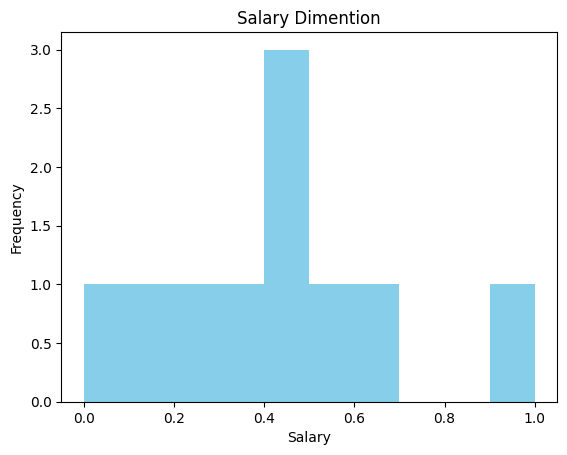

In [31]:
df_ecoded['Salary'].plot(kind='hist', bins=10, color='skyblue', title='Salary Dimention' ) #univariant analysis
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

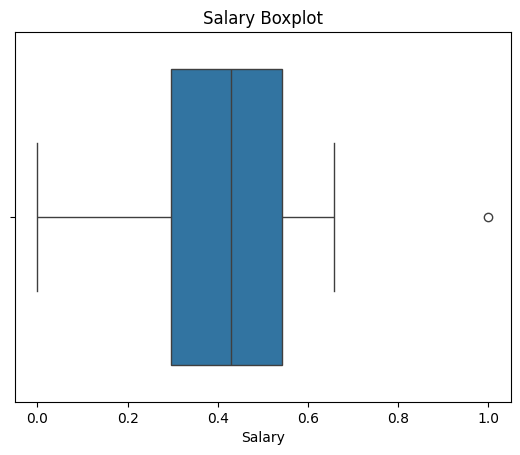

In [32]:
sns.boxplot(x=df_ecoded['Salary'])
plt.title('Salary Boxplot')
plt.show()

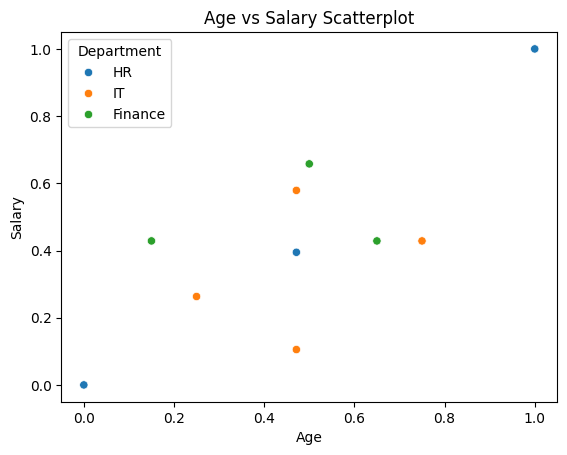

In [34]:
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Department']) # by varient analysis
plt.title('Age vs Salary Scatterplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

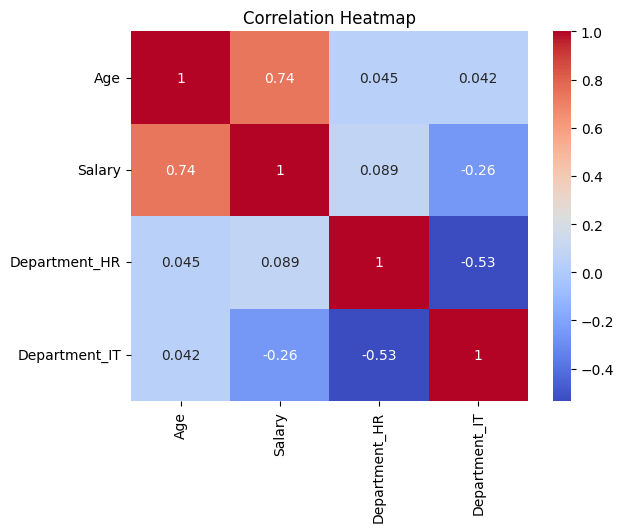

In [42]:
sns.heatmap(df_ecoded.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm') # correlation
plt.title('Correlation Heatmap')
plt.show()

# Hospital dataset

In [43]:
hospital_data = {
    'Patient_ID': list(range(1, 11)),
    'Age': [np.nan if i in [1, 4, 7] else np.random.randint(20, 80) for i in range(10)],
    'Diagnosis_Code': np.random.choice(['A', 'B', 'C', 'D', 'E'], 10).tolist(),
    'Treatment_Cost': [np.nan if i in [3, 8] else np.random.randint(500, 5000) for i in range(10)],
    'Length_of_Stay': np.random.randint(1, 15, 10).tolist()
}

In [44]:
df = pd.DataFrame(hospital_data)

In [45]:
df.isnull().sum()

,0
Patient_ID,0
Age,3
Diagnosis_Code,0
Treatment_Cost,2
Length_of_Stay,0


In [46]:
df[['Age','Treatment_Cost']] = df[['Age','Treatment_Cost']].fillna(df[['Age','Treatment_Cost']].mean())

In [47]:
df

,Patient_ID,Age,Diagnosis_Code,Treatment_Cost,Length_of_Stay
0,1,49.000000,C,4750.0,3
1,2,47.857143,B,3465.0,3
2,3,52.000000,A,3280.0,8
3,4,30.000000,A,3255.0,8
4,5,47.857143,E,4991.0,2
5,6,60.000000,D,4303.0,1
6,7,46.000000,D,1601.0,4
7,8,47.857143,E,2516.0,8
8,9,43.000000,A,3255.0,10
9,10,55.000000,E,1134.0,4


In [48]:
scaller = MinMaxScaler()
df[['Age','Treatment_Cost','Length_of_Stay']] = scaller.fit_transform(df[['Age','Treatment_Cost','Length_of_Stay']])

In [49]:
df.head()

,Patient_ID,Age,Diagnosis_Code,Treatment_Cost,Length_of_Stay
0,1,0.633333,C,0.937516,0.222222
1,2,0.595238,B,0.604356,0.222222
2,3,0.733333,A,0.556391,0.777778
3,4,0.000000,A,0.549909,0.777778
4,5,0.595238,E,1.000000,0.111111


In [50]:
df_ecoded=pd.get_dummies(df,columns=['Diagnosis_Code'],drop_first=True)

In [51]:
df_ecoded.head()

,Patient_ID,Age,Treatment_Cost,Length_of_Stay,Diagnosis_Code_B,Diagnosis_Code_C,Diagnosis_Code_D,Diagnosis_Code_E
0,1,0.633333,0.937516,0.222222,False,True,False,False
1,2,0.595238,0.604356,0.222222,True,False,False,False
2,3,0.733333,0.556391,0.777778,False,False,False,False
3,4,0.000000,0.549909,0.777778,False,False,False,False
4,5,0.595238,1.000000,0.111111,False,False,False,True


In [52]:
df_ecoded.describe()

,Patient_ID,Age,Treatment_Cost,Length_of_Stay
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,0.595238,0.549909,0.455556
std,3.02765,0.263607,0.325348,0.345260
min,1.00000,0.000000,0.000000,0.000000
25%,3.25000,0.548810,0.406209,0.222222
50%,5.50000,0.595238,0.553150,0.333333
75%,7.75000,0.708333,0.767306,0.777778
max,10.00000,1.000000,1.000000,1.000000


In [53]:
df.shape

(10, 5)

In [54]:
df.dtypes

,0
Patient_ID,int64
Age,float64
Diagnosis_Code,object
Treatment_Cost,float64
Length_of_Stay,float64


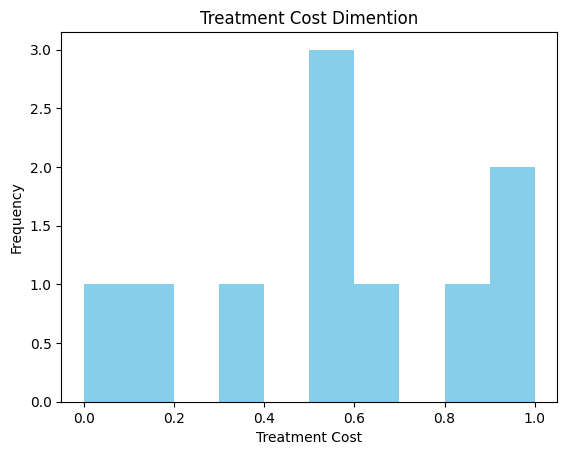

In [56]:
df_ecoded['Treatment_Cost'].plot(kind='hist', bins=10, color='skyblue', title='Treatment Cost Dimention')
plt.xlabel('Treatment Cost')
plt.ylabel('Frequency')
plt.show()

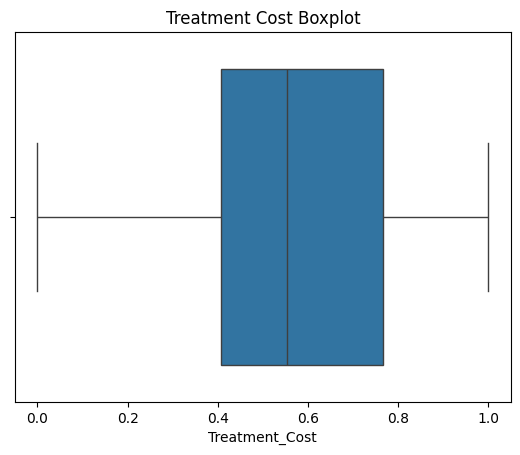

In [57]:
sns.boxplot(x=df_ecoded['Treatment_Cost'])
plt.title('Treatment Cost Boxplot')
plt.show()


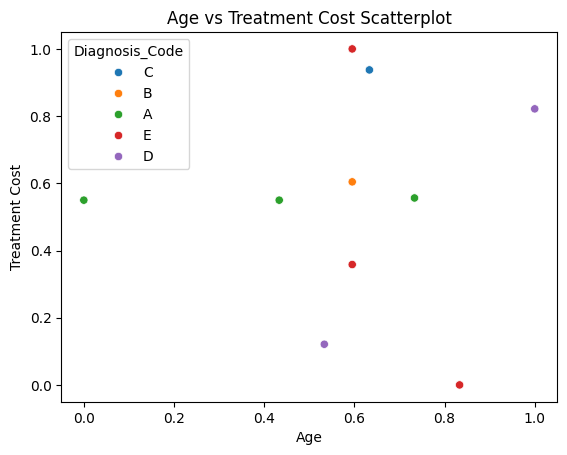

In [59]:
sns.scatterplot(x=df['Age'], y=df['Treatment_Cost'], hue=df['Diagnosis_Code'])
plt.title('Age vs Treatment Cost Scatterplot')
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.show()

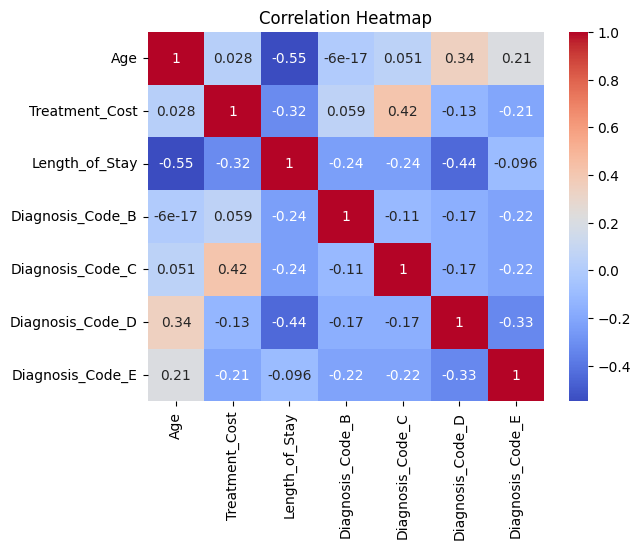

In [62]:
sns.heatmap(df_ecoded.drop('Patient_ID', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()